# Projekt 2 - EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Wczytanie danych

Sczytujemy nazwy kolumn:

In [2]:
col_names = pd.read_csv("UCI HAR Dataset/features.txt", delim_whitespace=True, header=None)[1]

Do występujących kolumn o zduplikowanych nazwach dodajemy odpowiednią numerację.

In [3]:
for i in range(42):
    col_names[302+i] += ["--1","--2","--3"][(i)//14]
    col_names[381+i] += ["--1","--2","--3"][(i)//14]
    col_names[460+i] += ["--1","--2","--3"][(i)//14]

In [4]:
X_train = pd.read_csv("UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None, names=col_names)

## Pierwsze spojrzenie

Poniższcze EDA opiera się jedynie o wykorzystanie zbioru treningowego - X_train. Zachowujemy się, jakbyśmy nie mieli label'i.

In [5]:
X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


Ze względu na charakter zbioru, bardzo istotnym wydaje się przygotowanie odpowiedniego opisu w ramach eksploracji danych, gdyż cech jest dużo i niemożliwym jest przygotowanie wizualizacji obrazujących wszystkie zależności między cechami, czy też plotowanie rozkładu każdej zmiennej. Posłużmy się zatem cennymi informacjami dostarczanymi przez autorów zbioru.

Jest on dostępny pod linkiem: http://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones#

Aby uzyskać dokładniejsze informacje należy zapoznać się z plikami .txt dostarczanymi wraz ze zbiorem. Teraz skupmy się jednak na interpretacji danych, na których będziemy rozpatrywali problem klasteryzacji.

Po pierwsze, każdy z 30 uczestników wykonywał jedną z 6 aktywności:\
1 WALKING\
2 WALKING_UPSTAIRS\
3 WALKING_DOWNSTAIRS\
4 SITTING\
5 STANDING\
6 LAYING

Autorzy dostarzają również film obrazaujący jak wyglądała cała aktywność.

![](klatka.png)

Klatka z filmu 
https://www.youtube.com/watch?v=XOEN9W05_4A

Ich aktywność była mierzona akcelerometrem i żyroskopem w pewnych przedziałach czasowych nazwanych oknami - 2.56 sekundy. Jeden rekord reprezentuje statystyki w obrębie odczytów własnie z tego przedziału czasowego.
Z akcelerometru szacowano przyspieszenie, z żyroskopu prędkość.

Dodatkowo wiemy, że dane są przeskalowane i ograniczone do przedziału [-1, 1]\
Jednostki akcelaratora to 'g', a żyroskopu 'rad/sek'

Przyjrzymy się, jak skonstruowane są cechy dla każdego z wektorów. Dokładne informacje są w pliku tekstowym, my jednak nauczymy się odczytywać znaczenie, co ułatwi zrozumienie dalszego EDA.

tBodyGyroJerk-iqr()-X
tBodyAccJerkMag-mean()
Każdą z chech mozna rozbić na 7 części

<pre>
_ 1 _   2  _  3  _   4  _  5  _    6    _   7  _

_ t _ Body _ Acc _ Jerk _ Mag _ -mean() _      _

1. 
na tej pozycji może wystąpić jedynie jedna z dwóch wartości: t lub f.
Informuje nas w jakiej dziedzinie jest rozpatrywana dana wartość t - czasu, f - częstotliwości.

2.
Body lub Gravity
Sygnały zostały rozseparowane na dwie zmienne, dotyczące przyspieszania wynikającego bezpośrednio z ruchu ciała oraz przyspieszenia grawitacyjnego. 

3. 
Acc lub Gyro
Daje informacje o rodzaju użytego sensora, akcelerometr lub żyroskop.

4.
Nic lub Jerk
Obecność flagi Jerk mowi, że jest to wartość opisująca szybkość zmian dla przyspieszenia. (Jerk dla przyspieszenia jest tym co przyspieszenie dla prędkości.)

5.
Nic lub Mag
Mag oznacza, że wartość dotyczy magnitudy sygnału, użyto normy euklidesowej do jej obliczenia.

6.
Rodzaj statystyki
Jest ich wiele, od średniej przez IQR, aż po skośność

7.
X, Y, Z lub nic
Określają wymiar, jeśli dana wartość go posiadała.
</pre>


In [6]:
X_train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


In [7]:
X_train.isna().any().any() #kompletność danych

False

In [8]:
X_train.hist(bins=40, figsize=(180,120), range=(-1,1))

plt.show()

Choć zestawienie 560+ histogramów wydaje się być kiepskim pomysłem, dostarcza to jednak ogólnych informacji na temat rozkładów po dokonanej normalizacji. W rozkładach wielu cech zaznacza się bardzo dużo liczba obserwacji na krańcach przedziału - ogromne ilości przy -1/1.

## Korelacje

### Korelacje pomiędzy wymiarami

In [9]:
# kod, który oblicza wszystkie korelacje dla zmiennych co mają trzy wymiary: X, Y, Z.

names = []
values = []

for name in col_names:
    if name[-1] == 'X':
        # zakładamy, że jak jest X to jest też Y i Z
        data = X_train[[name, name[:-1]+'Y', name[:-1]+'Z']].corr(method = 'spearman')
        names.append(name+'-Y')
        values.append(data[name][1])
        names.append(name+'-Z')
        values.append(data[name][2])
        names.append(name[:-1]+'Y-Z')
        values.append(data[name[:-1]+'Y'][2])
        
xyz_correlation = pd.DataFrame({'Name' : names, 'Value': values})

In [10]:
xyz_correlation.sort_values(by = "Value", ascending = False).reset_index(drop = True)

,Name,Value
0,fBodyAccJerk-entropy()-X-Y,0.941922
1,fBodyAccJerk-mean()-X-Y,0.936600
2,tBodyGyroJerk-energy()-X-Z,0.936017
3,tBodyGyroJerk-std()-X-Z,0.935921
4,tBodyGyroJerk-mad()-X-Z,0.935599
...,...,...
223,tGravityAcc-mean()-X-Y,-0.279483
224,tGravityAcc-max()-X-Y,-0.297975
225,tBodyGyro-mean()-X-Y,-0.564988
226,tGravityAcc-energy()-X-Y,-0.794234


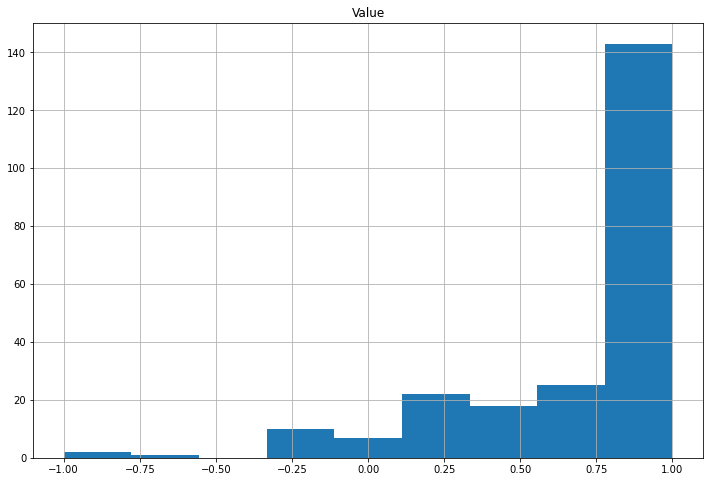

In [11]:
xyz_correlation.hist(bins=9, figsize=(12,8), range=(-1,1))

plt.show()

Można zauważyć, że znaczna większość kolumn odpowiadających za dane w trzech wymiarach jest parami mocno skorelowana. Będziemy rozważać usunięcie bądź modyfikację tych kolumn.

### Korelacje pomiędzy czasem a częstotliwością

In [12]:
# kod, który oblicza korelacje między parami wartości,
# to jest reprezantacjami w domenie czasu i częstotliwości tej samej zmiennej.

names = []
values = []

for name in col_names:
    if name[0] == 't':
        for name2 in col_names:
            if name2 == 'f' + name[1:]:
                names.append(name[1:])
                values.append(X_train[[name, name2]].corr(method = "spearman")[name][1])
                
ft_correlation = pd.DataFrame({'Name' : names, 'Value': values})

In [13]:
ft_correlation.sort_values(by = "Value", ascending = False).reset_index(drop = True)

,Name,Value
0,BodyAccJerk-energy()-X,0.999993
1,BodyAccJerk-energy()-Z,0.999984
2,BodyAccJerk-energy()-Y,0.999982
3,BodyAcc-energy()-X,0.998837
4,BodyGyro-std()-X,0.998579
...,...,...
79,BodyAccJerk-min()-Y,-0.794167
80,BodyGyro-min()-X,-0.794520
81,BodyAccJerk-min()-X,-0.811827
82,BodyGyro-min()-Y,-0.817320


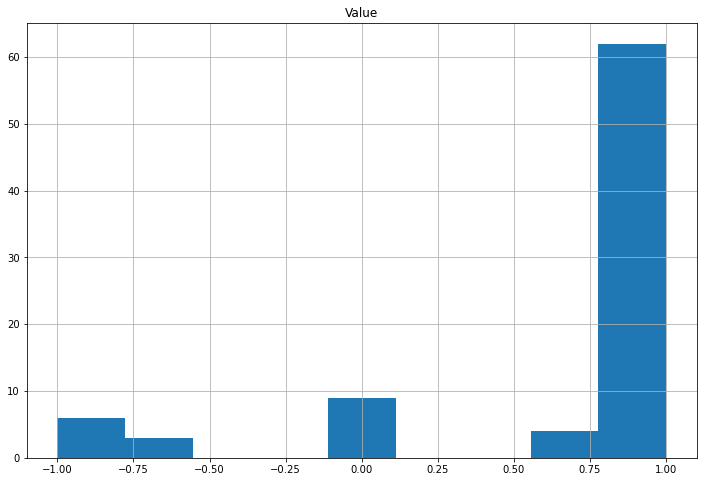

In [14]:
ft_correlation.hist(bins=9, figsize=(12,8), range=(-1,1))

plt.show()

Ze względu na dużą wielowymiarowość danych, rozważamy dokonanie redukcji wymiarów. Zastanawiamy się nad pozostawianiem tylko jednej z dwóch reprezentacji zmiennej - jedynie w czasie lub częstotliwości zależnie od wyników uzyskiwanych na kolejnym etapie, tzn. podczas wstępnego modelowania. Dokonaliśmy powyższczego badania korelacji, co zobrazowaliśmy histogramem. Wyniki również sugerują późniejsze ograniczenie ilości cech.

In [15]:
# kod do heatmapy

def plot_cor_heatmap(feature_name, suffix=''):
    col_names_list = []
    
    for name in col_names:
        if name.startswith(feature_name) and name.endswith(suffix):
            col_names_list.append(name)
    
    fig, ax = plt.subplots(figsize=(13,7)) 
    sns.heatmap(X_train[col_names_list].corr(method = 'spearman'),
                linewidths=.5, center = 0, annot=True, vmin=-1)
    plt.show()

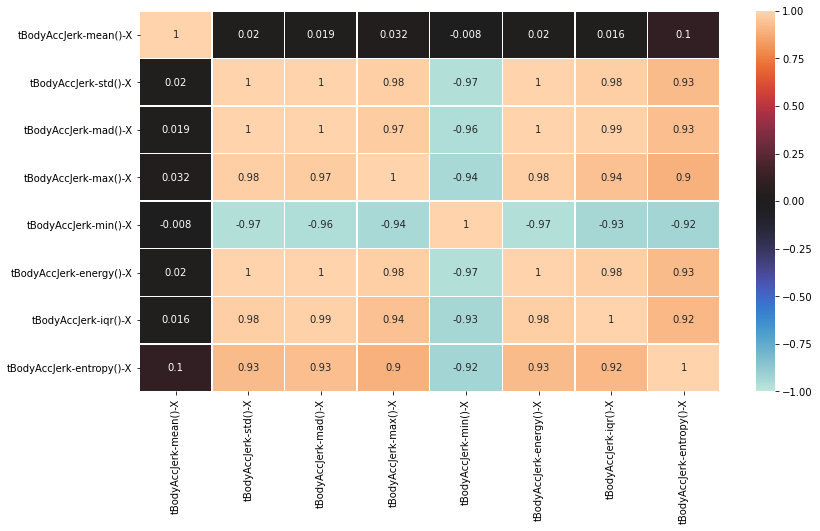

In [16]:
plot_cor_heatmap('tBodyAccJerk', '-X')

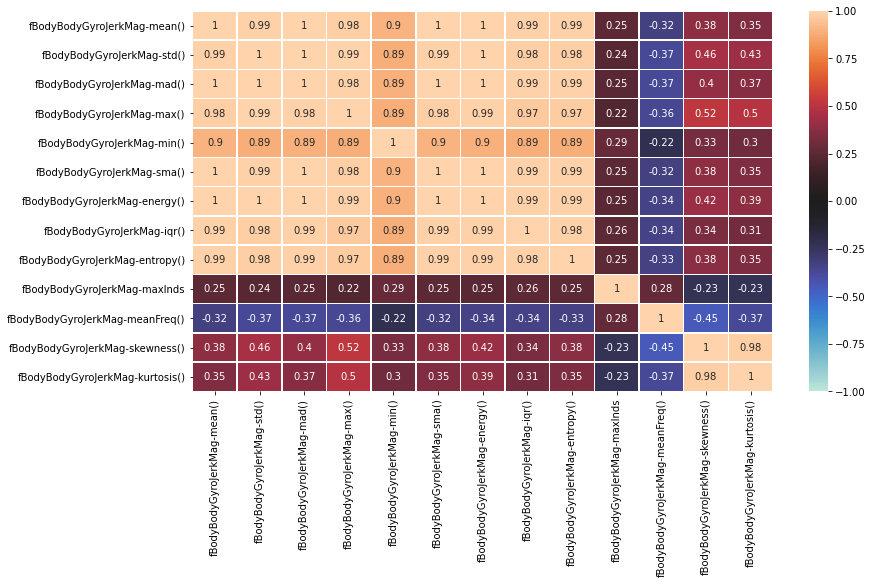

In [17]:
plot_cor_heatmap('fBodyBodyGyroJerkMag')

Jak widać, autorzy zbioru podają wiele różnych statystyk dla danej zmiennej. Szczególnie warto zauważyć, że powielane są statystyki dotyczące położenia, rozproszenia oraz kształtu. Dlatego kolejnym - wydaje się słusznym - działaniem będzie zdecydowanie się na tylko pewne statystyki z danego rodzaju.

## Podsumowanie korelacji

Jak widać dla wielu sposobów podejścia do danych osiągane są bardzo wysokie korelacje, czy to między dziedzinami, czy wymiarami, czy rodzajem statystyki. Dlatego będziemy musieli bazować na swojej intuicji, gdyż ciężko jest nam obecnie wyciągać jednoznaczne wnioski jakie działania przyniosą pozytywne efekty w działaniu modelu. Prócz kierowania się logicznymi przesłankami, uważamy, że niezbędne będą empiryczne działania modelu.

Zatem podsumowując, będziemy dążyli do dokonania redukcji w wielu płaszczyznach w domenie zmiennych, w wymiarach X, Y, Z, ograniczenie liczby zmiennych, wybranie tylko pewnego zbioru statystyk dotyczących poszczególnie położenia, rozproszenia i kształtu. W szczególności planujemy podejmować decyzje na podstawie eksperymentowania w fazie wstępnego modelowania.